# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
from scipy import stats
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

x=[17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
y=[10,1,5,9,4,2,9,6,0,3]
student_data=pd.DataFrame({'Age': x, 'Tardies': y})
student_data.head()

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4


Draw a dispersion diagram (scatter plot) for the data.

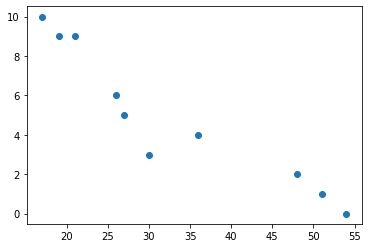

In [2]:
plt.scatter(x,y)
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [3]:
# Your response here. 
#The tardies decrease when increasing the age. It looks like there is a negative correlation

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
# Your response here.
#correlation:
cor=np.corrcoef(student_data['Age'],student_data['Tardies'])
print(cor[1][0])

#covariance:
cov=np.cov(student_data['Age'],student_data['Tardies'])
print(cov[0][1])

#Covariance have units which are very difficult to understand.
#If it is positive we can say there positive correlation. If negative there is a negative correlation.
#If it is 0 there is no correlation

#If the Correlation is close to 1 there is a strong positive correlation
#If Correlation is close to -1 there is a strong negative correlation

#In this case we have a very strong negative correlation

#print(np.cov(stacked)[0][1]/((np.std(student_data["Age"]))*(np.std(student_data["Tardies"]))))
#Test to see if it is correct the covariance calculation

-0.9391626886887122
-45.56666666666667


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [19]:
x=student_data['Age']
y=student_data['Tardies']
results = stats.linregress(x,y)
print(results)
#Linear regression. The outputs are the parameters for a the linear equation. Rvalue is the pearson correlation

LinregressResult(slope=-0.24282077091598084, intercept=12.88880336313577, rvalue=-0.9391626886887123, pvalue=5.56665383455336e-05, stderr=0.03139728816158602)


Plot your regression model on your scatter plot.

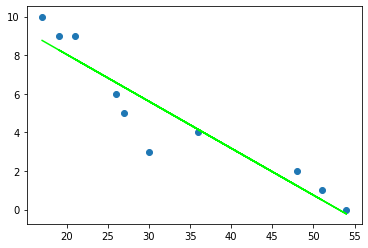

In [18]:
regression_line=results[0] * x + results[1]

plt.scatter(x,y)
plt.plot(x,regression_line, c="lime")

plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [ ]:
#The model reflects the strong correlation between both variables.
#Rvalue = -0.93 is a very strong negative correlation meaning with the increase of the independent variable age
#there is a decrease in the Tardies

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [27]:
# Import any libraries you may need & the data
import seaborn as sns
data=pd.read_csv("vehicles.csv")
data.head(3)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [29]:
data[["Year","Cylinders","Fuel Barrels/Year","Combined MPG","Fuel Cost/Year","CO2 Emission Grams/Mile"]].corr().style.background_gradient(cmap=sns.light_palette("green", as_cmap=True))
#The year provides the least information for determing the CO2 emissions
#The variable most important to determine CO2 emissions is the Fuels Barrels/Year

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [64]:
import statsmodels.api as sm
x=data[['Fuel Barrels/Year','Combined MPG', 'Fuel Cost/Year']]
y=data["CO2 Emission Grams/Mile"]

model = sm.OLS(y,x).fit()

#Least Squares method for the regression

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          8.760e+06
Date:                     Mon, 27 Jul 2020   Prob (F-statistic):                        0.00
Time:                             20:00:35   Log-Likelihood:                     -1.5515e+05
No. Observations:                    35952   AIC:                                  3.103e+05
Df Residuals:                        35949   BIC:                                  3.103e+05
Df Model:                                3                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fuel Barrels/Year    22.4724      0.051    437.446      0.000      22.372      22.573
Combined MPG          0.1052      0.010     10.622      0.000       0.086       0.125
Fuel Cost/Year        0.0408      0.000     86.909      0.000       0.040       0.042
==============================================================================
Omnibus:                    79210.856   Durbin-Watson:                   0.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        470089111.722
Skew:                          20.397   Prob(JB):                         0.00
Kurtosis:                     561.701   Cond. No.                     1.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [66]:
print(model.summary())

#R-squared os the most important parameter. Being close to 1 means that the model is very good.

                                   OLS Regression Results                                   
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          8.760e+06
Date:                     Mon, 27 Jul 2020   Prob (F-statistic):                        0.00
Time:                             20:04:09   Log-Likelihood:                     -1.5515e+05
No. Observations:                    35952   AIC:                                  3.103e+05
Df Residuals:                        35949   BIC:                                  3.103e+05
Df Model:                                3                                                  
Covariance Type:                 nonrobust                                                  
                        coef    std err          t      P>|t|      [0.

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [87]:
data = pd.DataFrame({'x': [1,3,4,6,8,9,11,14,], 'y': [1,2,4,4,5,7,8,13]})
data.head()
np.corrcoef(data["x"],data["y"])[1][0]
#np.correcoef calculates a linear regression
#0.96 means it has a high positive correlation

0.9652303546573691

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

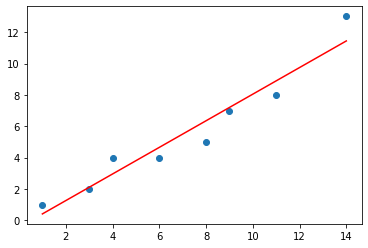

In [82]:
plt.scatter(data["x"],data["y"])

regression=stats.linregress(data["x"],data["y"])

y=regression[0]*data["x"]+regression[1]

plt.plot(data["x"],y,c="r")
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [89]:
#The positive correlation is confirmed with this plot.
print(regression)

LinregressResult(slope=0.8484848484848485, intercept=-0.43939393939393945, rvalue=0.9652303546573691, pvalue=0.00010236374464090686, stderr=0.09380896778286217)


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

0.9712781168250858


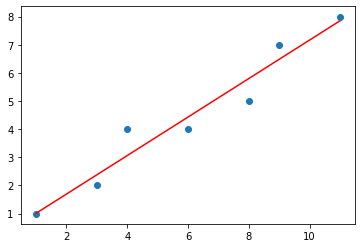

In [95]:
#(x,y)=(14,13) looks like and outlier

data2=data[data.columns][:-1]
print(np.corrcoef(data2["x"],data2["y"])[1][0])

plt.scatter(data2["x"],data2["y"])

regression=stats.linregress(data2["x"],data2["y"])

y=regression[0]*data2["x"]+regression[1]

plt.plot(data2["x"],y,c="r")
plt.show()

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [96]:
print(regression)
#It improves the r value so the regression line is better modelling the data

LinregressResult(slope=0.6842105263157895, intercept=0.32330827067669166, rvalue=0.971278116825086, pvalue=0.0002644056885656864, stderr=0.07496206665031294)